## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler
rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import plotly.express as px 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from fbprophet import Prophet as proph
from sklearn.metrics import mean_absolute_error
import holidays
holiday = pd.DataFrame([])
for date, name in sorted(holidays.UnitedStates(years=[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]).items()):
    holiday = holiday.append(pd.DataFrame({'ds': date, 'holiday': "US-Holidays"}, index=[0]), ignore_index=True)
holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')

# SPY

In [2]:
df_spy = pd.read_csv('spy.csv', index_col='Date', parse_dates=True)
df_spy

,Close
Date,
2006-04-06,1317.50
2006-04-07,1304.00
2006-04-10,1305.50
2006-04-11,1294.00
2006-04-12,1295.50
...,...
2022-01-18,4571.25
2022-01-19,4524.25
2022-01-20,4474.75


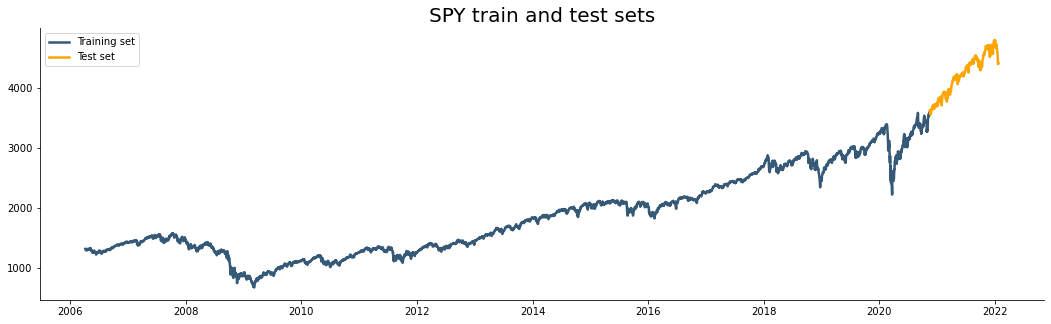

In [3]:
test_size = 300


df_spy_train = df_spy[:-test_size]
df_spy_test = df_spy[-test_size:]

plt.title('SPY train and test sets', size=20)
plt.plot(df_spy_train, label='Training set')
plt.plot(df_spy_test, label='Test set', color='orange')
plt.legend();

In [4]:
df_spy_train

,Close
Date,
2006-04-06,1317.5
2006-04-07,1304.0
2006-04-10,1305.5
2006-04-11,1294.0
2006-04-12,1295.5
...,...
2020-11-09,3544.0
2020-11-10,3541.0
2020-11-11,3568.0


In [5]:
df_spy_test

,Close
Date,
2020-11-16,3623.00
2020-11-17,3606.75
2020-11-18,3565.00
2020-11-19,3580.00
2020-11-20,3554.25
...,...
2022-01-18,4571.25
2022-01-19,4524.25
2022-01-20,4474.75


In [6]:
df_spy_test.reset_index(inplace=True)
df_spy_train.reset_index(inplace=True)

In [7]:
df_spy_test

,Date,Close
0,2020-11-16,3623.00
1,2020-11-17,3606.75
2,2020-11-18,3565.00
3,2020-11-19,3580.00
4,2020-11-20,3554.25
...,...,...
295,2022-01-18,4571.25
296,2022-01-19,4524.25
297,2022-01-20,4474.75
298,2022-01-21,4390.00


In [8]:
df_spy_train

,Date,Close
0,2006-04-06,1317.5
1,2006-04-07,1304.0
2,2006-04-10,1305.5
3,2006-04-11,1294.0
4,2006-04-12,1295.5
...,...,...
3676,2020-11-09,3544.0
3677,2020-11-10,3541.0
3678,2020-11-11,3568.0
3679,2020-11-12,3532.5


In [9]:
# Rename the columns [Date,Close] to [ds, y]

ts_spy = df_spy_train

ts_spy = df_spy_train.rename(columns={'Date': 'ds',
                        'Close': 'y'})

ts_spy_test = df_spy_test.rename(columns={'Date': 'ds',
                        'Close': 'y'})
ts_spy.tail(5)

,ds,y
3676,2020-11-09,3544.0
3677,2020-11-10,3541.0
3678,2020-11-11,3568.0
3679,2020-11-12,3532.5
3680,2020-11-13,3582.0


In [10]:
x_spy_test = ts_spy_test[['ds']]

In [11]:
ts_spy_test

,ds,y
0,2020-11-16,3623.00
1,2020-11-17,3606.75
2,2020-11-18,3565.00
3,2020-11-19,3580.00
4,2020-11-20,3554.25
...,...,...
295,2022-01-18,4571.25
296,2022-01-19,4524.25
297,2022-01-20,4474.75
298,2022-01-21,4390.00


In [14]:
# set the uncertainty interval to 95% (the Prophet default is 80%) with improved parameters

#{'changepoint_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}
#Mean Absolute Percentage Error(MAPE)------------------------------------ 18.00439664116795


Model_spy_final = proph(interval_width=0.95,daily_seasonality=True,holidays=holiday,seasonality_mode='multiplicative',
                  changepoints=150,changepoint_prior_scale=0.3)


In [15]:
# Fit the timeseries into Model
Model_spy_final.fit(ts_spy)

ValueError: Changepoints must fall within training data.

In [ ]:
# Use make_future_dataframe with a daily frequency and periods = 1518 for 6 years
future_spy_dates = Model_spy.make_future_dataframe(periods=1518, freq='D')
future_spy_dates.tail()

In [ ]:
future_spy_dates= future_spy_dates.loc[future_spy_dates['ds'] >= '2020-11-16']

In [ ]:
x_spy_test = pd.DataFrame(x_spy_test)

In [ ]:
x_spy_test

In [ ]:
# Predict the values for future dates and take the head of forecast

predicitons_spy = Model_spy.predict(x_spy_test)

In [ ]:
x_spy_test

In [ ]:
forecast_spy = Model_spy.predict(future_spy_dates)

In [ ]:
future_spy_dates.head(15)

In [ ]:
forecast_spy.tail()

In [ ]:
Model_spy.plot(forecast_spy, uncertainty=True)
plt.show()

In [ ]:
df_spy_test = pd.concat([df_spy_test,predicitons_spy], axis=1)
df_spy_test

In [ ]:
predicitons_spy

In [ ]:
df_spy_test.yhat.value_counts()

In [ ]:
mean_squared_error(df_spy_test.Close,df_spy_test.yhat,squared=False)

## Plotting Forecast vs Actuals

In [ ]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
ts_spy_test.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
predicitons_spy.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('SPY Forecast vs Actuals')
plt.show()

In [ ]:
x_spy_test

### MAPE

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape = mean_absolute_percentage_error(ts_spy_test['y'],predicitons_spy['yhat'])
print("MAPE",round(mape,4))

# DOW

In [ ]:
df_dow = pd.read_csv('dow.csv', index_col='Date', parse_dates=True)
df_dow

In [ ]:
test_size = 300


df_dow_train = df_dow[:-test_size]
df_dow_test = df_dow[-test_size:]

plt.title('DOW train and test sets', size=20)
plt.plot(df_dow_train, label='Training set')
plt.plot(df_dow_test, label='Test set', color='orange')
plt.legend();

In [ ]:
df_dow_train

In [ ]:
df_dow_test

In [ ]:
df_dow_test.reset_index(inplace=True)
df_dow_train.reset_index(inplace=True)

In [ ]:
df_dow_test

In [ ]:
df_dow_train

In [ ]:
# Rename the columns [Date,Close] to [ds, y]

ts_dow = df_dow_train

ts_dow = df_dow_train.rename(columns={'Date': 'ds',
                        'Close': 'y'})

ts_dow_test = df_dow_test.rename(columns={'Date': 'ds',
                        'Close': 'y'})
ts_dow.tail(5)

In [ ]:
x_dow_test = ts_dow_test[['ds']]

In [ ]:
ts_dow_test

In [ ]:
# set the uncertainty interval to 95% (the Prophet default is 80%) with new improved parameters


Model_dow = proph(interval_width=0.95,daily_seasonality=True,holidays=holiday)


In [ ]:
# Fit the timeseries into Model
Model_dow.fit(ts_dow)

In [ ]:
# Use make_future_dataframe with a daily frequency and periods = 1518 for 6 years
future_dow_dates = Model_dow.make_future_dataframe(periods=1518, freq='D')
future_dow_dates.tail()

In [ ]:
future_dow_dates= future_dow_dates.loc[future_dow_dates['ds'] >= '2020-11-16']

In [ ]:
x_dow_test = pd.DataFrame(x_dow_test)

In [ ]:
x_dow_test

In [ ]:
# Predict the values for future dates and take the head of forecast

predicitons_dow = Model_dow.predict(x_dow_test)

In [ ]:
x_dow_test

In [ ]:
forecast_dow = Model_dow.predict(future_dow_dates)

In [ ]:
future_dow_dates.head(15)

In [ ]:
forecast_dow.tail()

gold_roi = forecast_gold.copy()
gold_roi.set_index('ds',inplace=True)
gold_last_value = pd.DataFrame()
gold_last_value['y'] = gold_roi.groupby(df.index.month).tail(1)['yhat']
gold_last_value['ROI'] = gold_last_value['y'] / ts_gold_test.iloc[0,1]*100

In [ ]:
Model_dow.plot(forecast_dow, uncertainty=True)
plt.show()

In [ ]:
df_dow_test = pd.concat([df_dow_test,predicitons_dow], axis=1)
df_dow_test

In [ ]:
predicitons_dow

In [ ]:
df_dow_test.yhat.value_counts()

In [ ]:
mean_squared_error(df_dow_test.Close,df_dow_test.yhat,squared=False)

## Plotting Forecast vs Actuals

In [ ]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
ts_dow_test.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
predicitons_dow.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('DOW Forecast vs Actuals')
plt.show()

In [ ]:
x_dow_test

### MAPE

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape = mean_absolute_percentage_error(ts_dow_test['y'],predicitons_dow['yhat'])
print("MAPE",round(mape,4))

# NASDAQ

In [ ]:
df_nas = pd.read_csv('nas.csv', index_col='Date', parse_dates=True)
df_nas

In [ ]:
test_size = 300


df_nas_train = df_nas[:-test_size]
df_nas_test = df_nas[-test_size:]

plt.title('Nasdaq train and test sets', size=20)
plt.plot(df_nas_train, label='Training set')
plt.plot(df_nas_test, label='Test set', color='orange')
plt.legend();

In [ ]:
df_nas_train

In [ ]:
df_nas_test

In [ ]:
df_nas_test.reset_index(inplace=True)
df_nas_train.reset_index(inplace=True)

In [ ]:
df_nas_test

In [ ]:
df_nas_train

In [ ]:
# Rename the columns [Date,Close] to [ds, y]

ts_nas = df_nas_train

ts_nas = df_nas_train.rename(columns={'Date': 'ds',
                        'Close': 'y'})

ts_nas_test = df_nas_test.rename(columns={'Date': 'ds',
                        'Close': 'y'})
ts_nas.tail(5)

In [ ]:
x_nas_test = ts_nas_test[['ds']]

In [ ]:
ts_nas_test

In [ ]:
# set the uncertainty interval to 95% (the Prophet default is 80%) with improved parameters

{'changepoint_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 22.21463241663814

Model_nas = proph(interval_width=0.95,daily_seasonality=True,holidays=holiday,changepoint_prior_scale=0.2,
                  changepoints=100,seasonality_mode='additive')


In [ ]:
# Fit the timeseries into Model
Model_nas.fit(ts_nas)

In [ ]:
# Use make_future_dataframe with a daily frequency and periods = 1518 for 6 years
future_nas_dates = Model_nas.make_future_dataframe(periods=1518, freq='D')
future_nas_dates.tail()

In [ ]:
future_nas_dates= future_nas_dates.loc[future_nas_dates['ds'] >= '2020-11-16']

In [ ]:
x_nas_test = pd.DataFrame(x_nas_test)

In [ ]:
x_nas_test

In [ ]:
# Predict the values for future dates and take the head of forecast

predicitons_nas = Model_nas.predict(x_nas_test)

In [ ]:
x_nas_test

In [ ]:
forecast_nas = Model_nas.predict(future_nas_dates)

In [ ]:
future_nas_dates.head(15)

In [ ]:
forecast_nas.tail()

gold_roi = forecast_gold.copy()
gold_roi.set_index('ds',inplace=True)
gold_last_value = pd.DataFrame()
gold_last_value['y'] = gold_roi.groupby(df.index.month).tail(1)['yhat']
gold_last_value['ROI'] = gold_last_value['y'] / ts_gold_test.iloc[0,1]*100

In [ ]:
Model_nas.plot(forecast_nas, uncertainty=True)
plt.show()

In [ ]:
df_nas_test = pd.concat([df_nas_test,predicitons_nas], axis=1)
df_nas_test

In [ ]:
predicitons_nas

In [ ]:
df_nas_test.yhat.value_counts()

In [ ]:
mean_squared_error(df_nas_test.Close,df_nas_test.yhat,squared=False)

## Plotting Forecast vs Actuals

In [ ]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
ts_nas_test.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
predicitons_nas.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Nasdaq Forecast vs Actuals')
plt.show()

In [ ]:
x_nas_test

### MAPE

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape = mean_absolute_percentage_error(ts_nas_test['y'],predicitons_nas['yhat'])
print("MAPE",round(mape,4))

In [ ]:
spy_roi = forecast_spy.copy()
spy_roi.set_index('ds',inplace=True)
spy_last_value = pd.DataFrame()
spy_last_value['last_value_month'] = spy_roi['yhat'].resample('M').apply(lambda ser: ser.iloc[-1,])
spy_last_value['ROI'] = spy_last_value['last_value_month'] / ts_spy_test.iloc[0,1]*100 - 100
spy_last_value.rename(columns={'ROI':'SPY_ROI'}, inplace=True)
spy_last_value

In [ ]:
dow_roi = forecast_dow.copy()
dow_roi.set_index('ds',inplace=True)
dow_last_value = pd.DataFrame()
dow_last_value['last_value_month'] = dow_roi['yhat'].resample('M').apply(lambda ser: ser.iloc[-1,])
dow_last_value['ROI'] = dow_last_value['last_value_month'] / ts_dow_test.iloc[0,1]*100 - 100
dow_last_value.rename(columns={'ROI':'Dow_ROI'}, inplace=True)
dow_last_value

In [ ]:
nas_roi = forecast_nas.copy()
nas_roi.set_index('ds',inplace=True)
nas_last_value = pd.DataFrame()
nas_last_value['last_value_month'] = nas_roi['yhat'].resample('M').apply(lambda ser: ser.iloc[-1,])
nas_last_value['ROI'] = nas_last_value['last_value_month'] / ts_nas_test.iloc[0,1]*100 - 100
nas_last_value.rename(columns={'ROI':'Nasdaq_ROI'}, inplace=True)
nas_last_value

In [ ]:
etfs_roi = pd.concat([spy_last_value,dow_last_value,nas_last_value],axis=1)
etfs_roi

In [ ]:
titles = ['S&P 500','Dow Jones Industrial Average','Nasdaq']
etfs_graph = px.line(x=etfs_roi.index, y=[etfs_roi.SPY_ROI,etfs_roi.Dow_ROI,etfs_roi.Nasdaq_ROI],
                           title= 'US ETFs ROI',labels = {'x':'Time Line','value':'ROI Percentage'})
for idx,name in enumerate(titles):
    etfs_graph.data[idx].name = name
    etfs_graph.data[idx].hovertemplate = name
etfs_graph.update_layout(title={'x':0.5,'y':0.9,'xanchor':'center','yanchor':'top'})
etfs_graph